# Multiple Linear Regression - Toyota Corolla Price Prediction

This notebook performs a comprehensive multiple linear regression analysis to predict the price of Toyota Corolla based on various vehicle attributes.


## 1. Data Loading and Initial Exploration


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [32]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
df.head()


Dataset shape: (1436, 11)

Column names: ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [33]:
print("Data types:")
print(df.dtypes)
print("\n" + "="*50)
print("\nDataset info:")
df.info()


Data types:
Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [34]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")
print(f"\nTotal missing values: {df.isnull().sum().sum()}")


Missing values per column:
No missing values found

Total missing values: 0


In [35]:
df.rename(columns={'Age_08_04': 'Age', 'Fuel_Type': 'FuelType', 'cc': 'CC'}, inplace=True)
print("Column names after renaming:")
print(list(df.columns))
df.head()


Column names after renaming:
['Price', 'Age', 'KM', 'FuelType', 'HP', 'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Weight']


,Price,Age,KM,FuelType,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


## 2. Exploratory Data Analysis (EDA)


In [36]:
print("Summary Statistics for Numeric Variables:")
print("="*60)
df.describe()


Summary Statistics for Numeric Variables:


,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [37]:
print("FuelType distribution:")
print(df['FuelType'].value_counts())
print(f"\nAutomatic distribution:")
print(df['Automatic'].value_counts())
print(f"\nDoors distribution:")
print(df['Doors'].value_counts())


FuelType distribution:
FuelType
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

Automatic distribution:
Automatic
0    1356
1      80
Name: count, dtype: int64

Doors distribution:
Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64


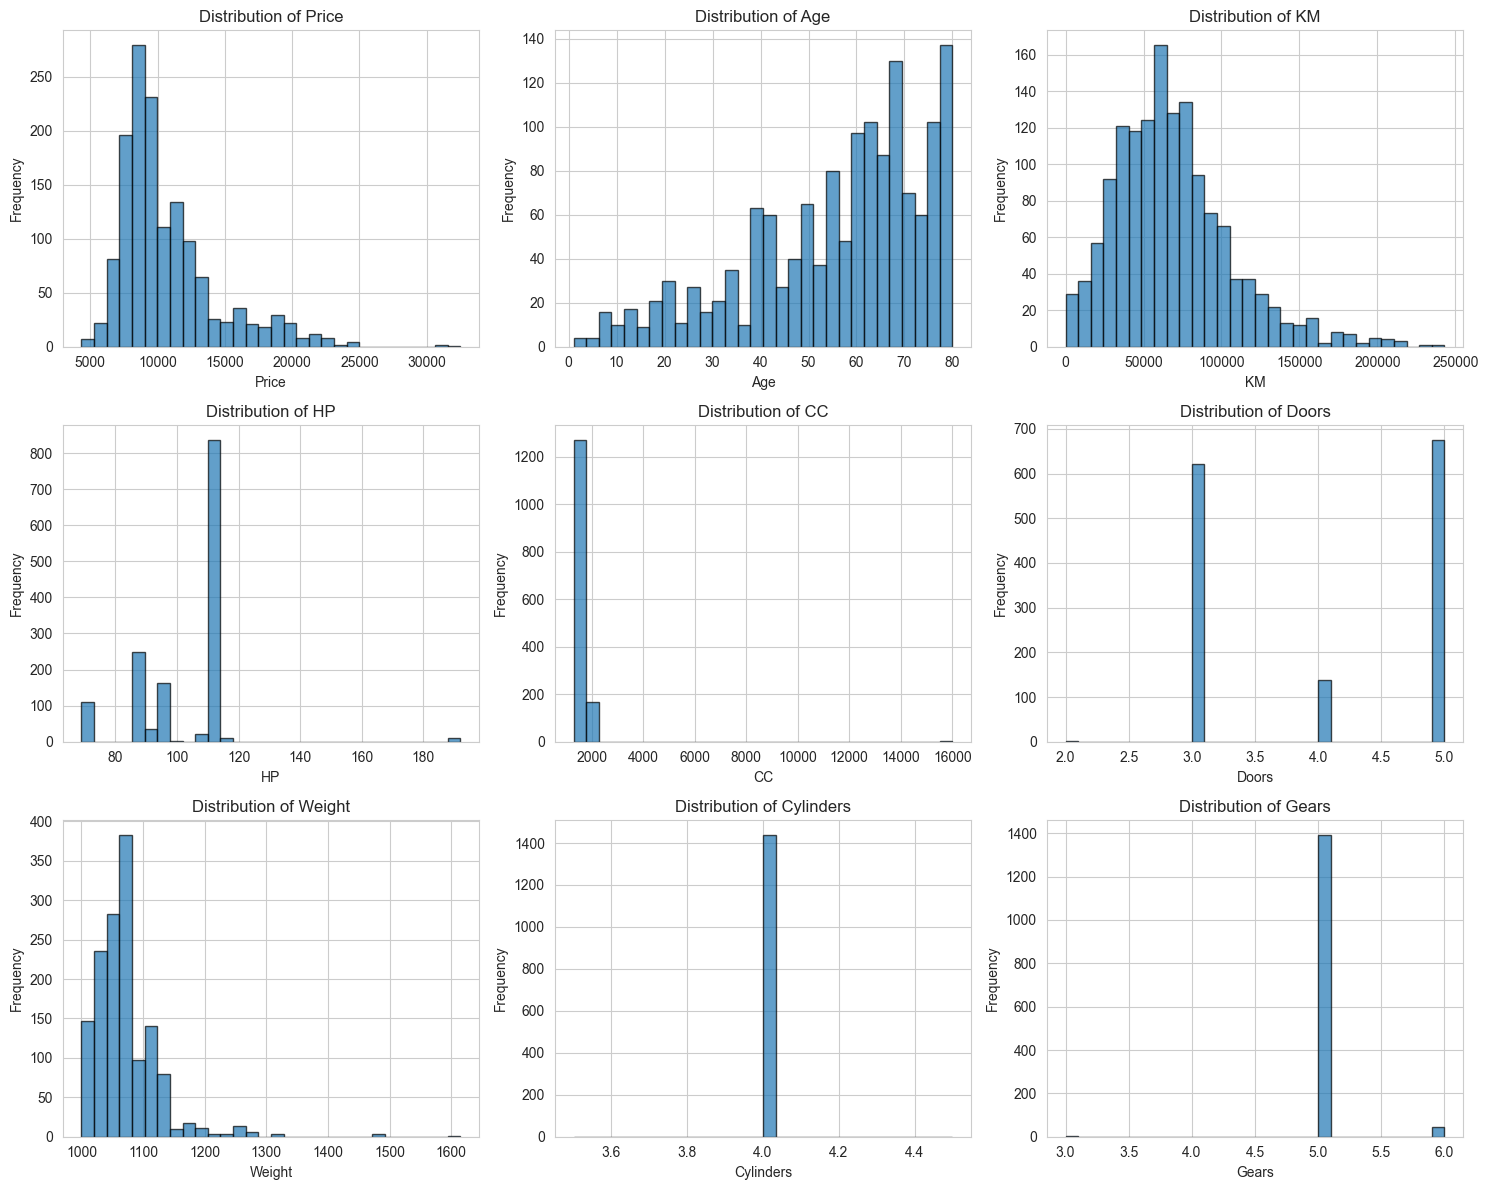

In [38]:
numeric_cols = ['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Weight', 'Cylinders', 'Gears']
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


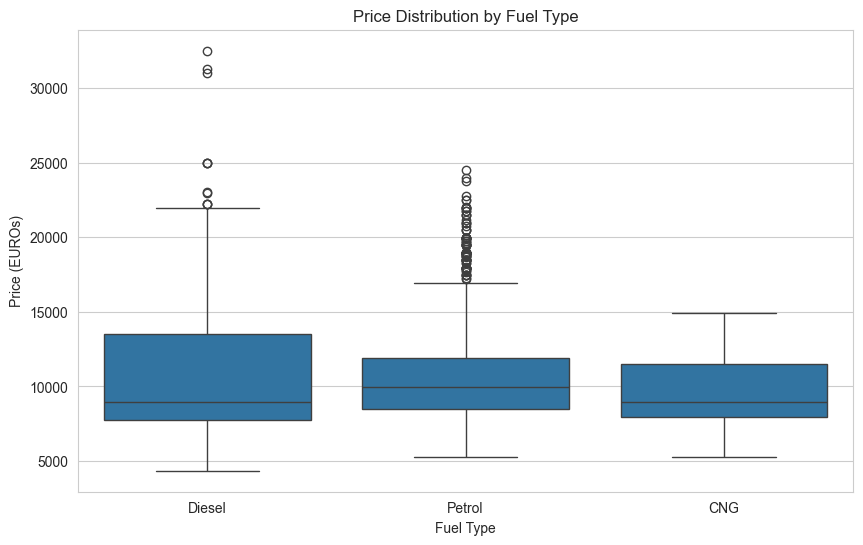

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FuelType', y='Price')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (EUROs)')
plt.show()


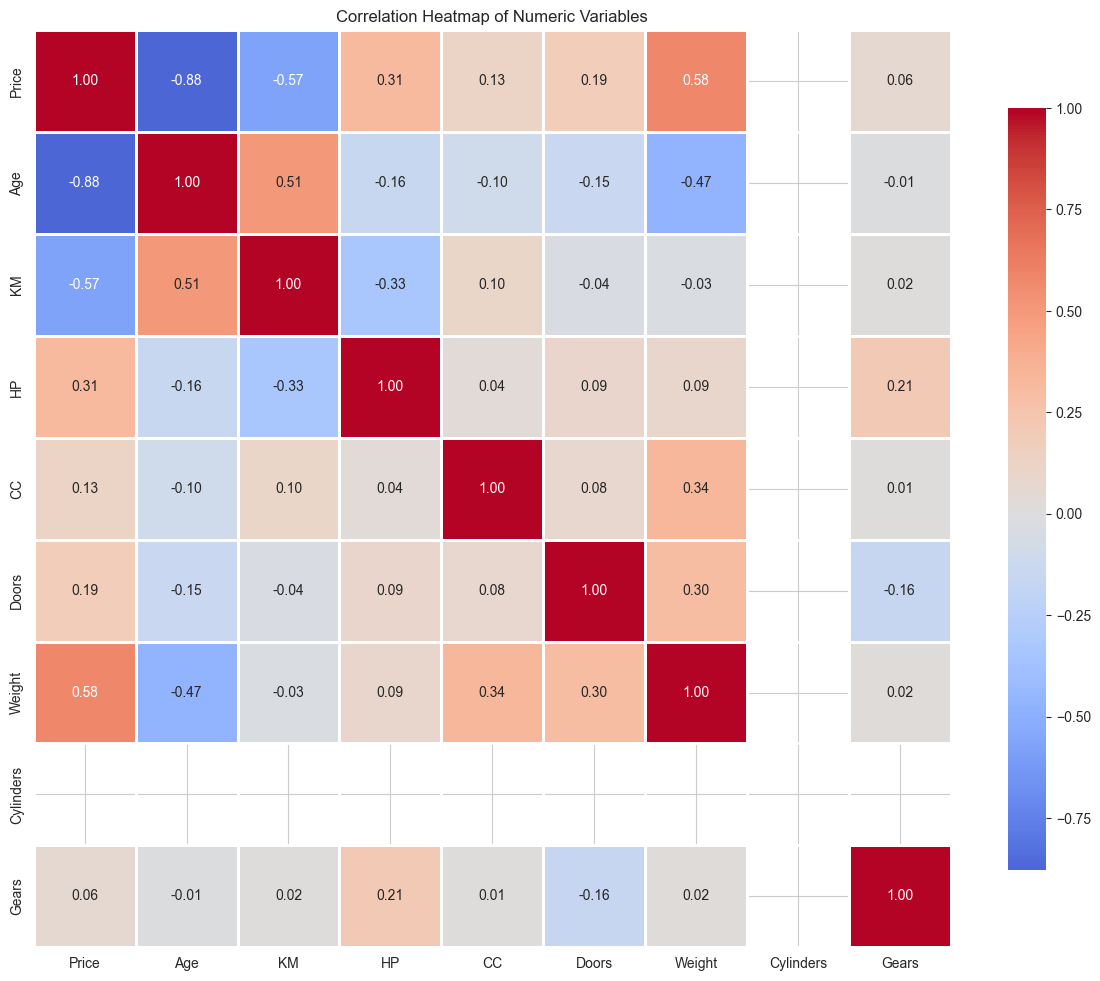

In [40]:
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()


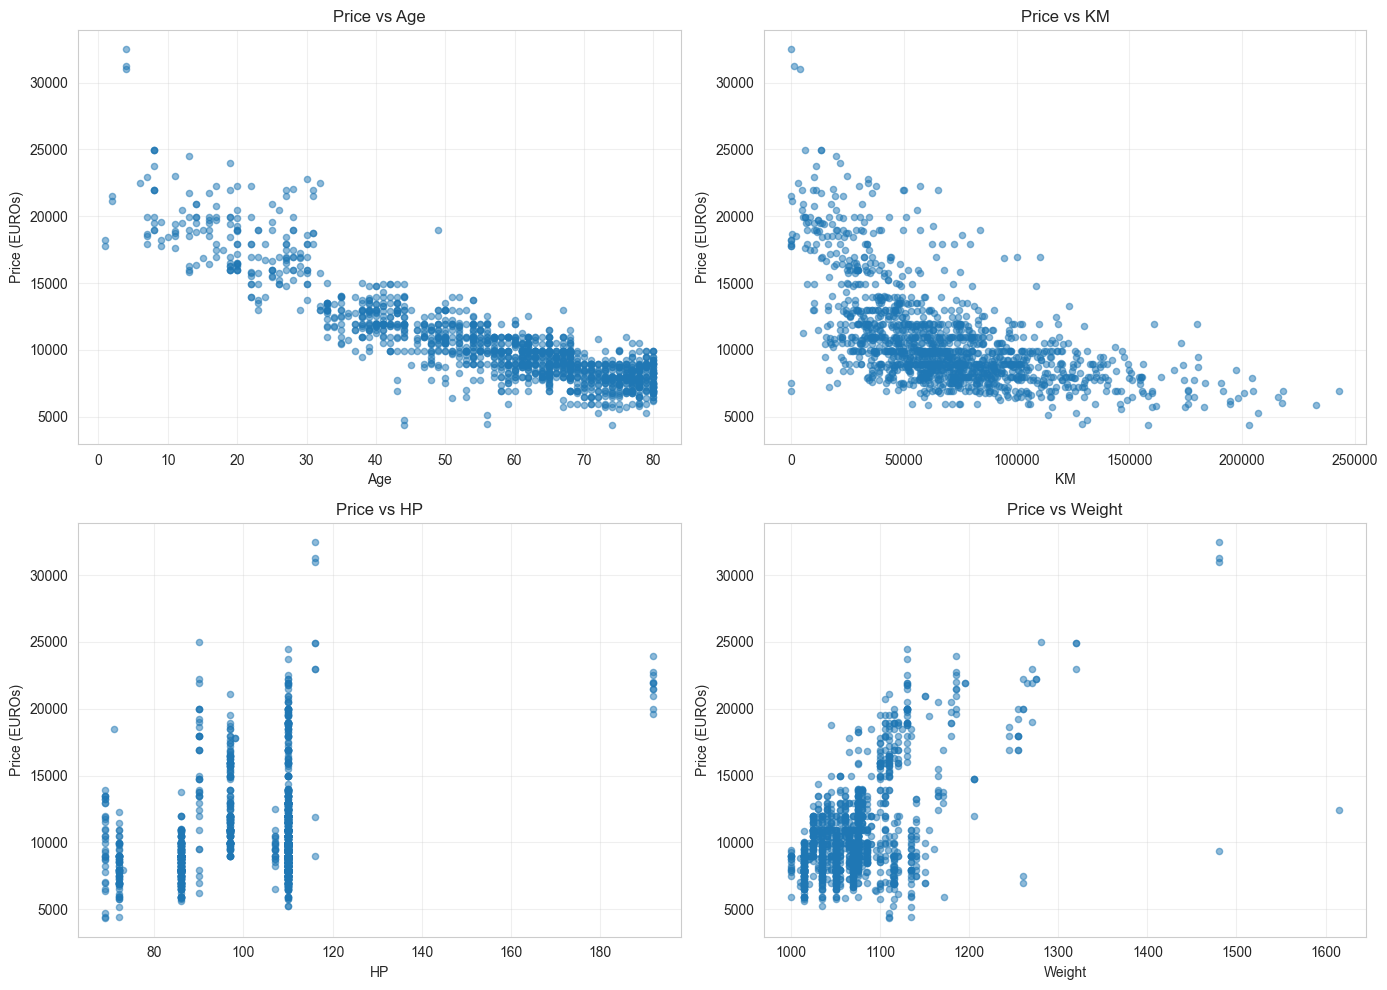

In [41]:
key_features = ['Age', 'KM', 'HP', 'Weight']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    axes[i].scatter(df[feature], df['Price'], alpha=0.5, s=20)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price (EUROs)')
    axes[i].set_title(f'Price vs {feature}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


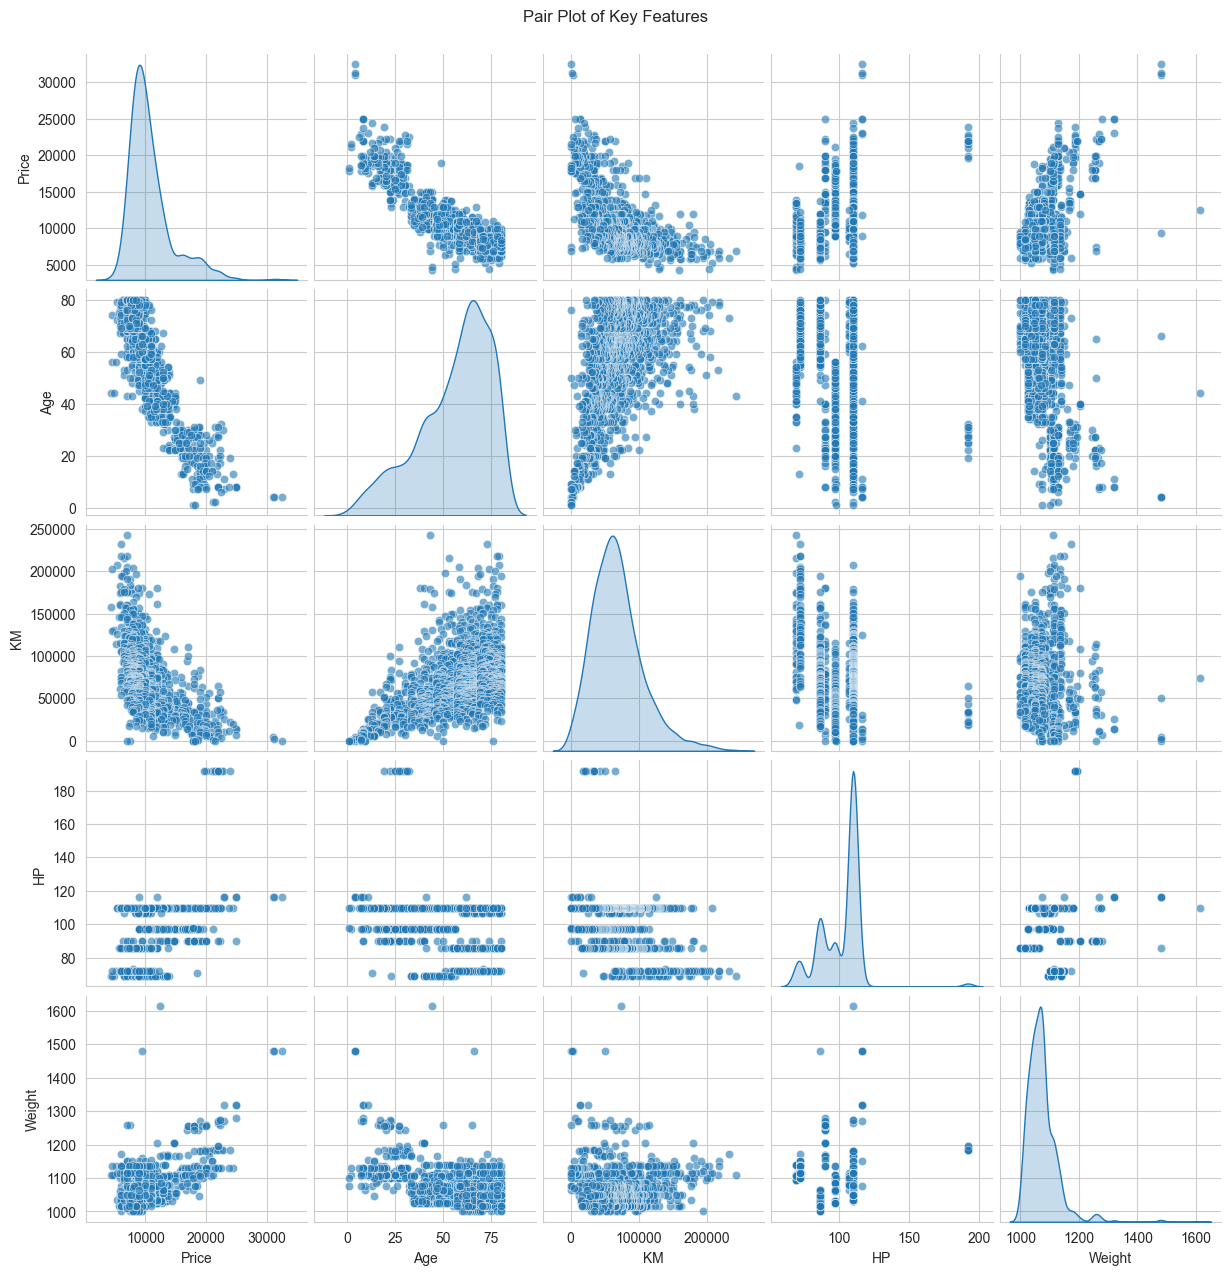

In [42]:
selected_features = ['Price', 'Age', 'KM', 'HP', 'Weight']
sns.pairplot(df[selected_features], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


In [43]:
print("Correlation with Price:")
price_corr = df[numeric_cols].corr()['Price'].sort_values(ascending=False)
print(price_corr)


Correlation with Price:
Price        1.000000
Weight       0.581198
HP           0.314990
Doors        0.185326
CC           0.126389
Gears        0.063104
KM          -0.569960
Age         -0.876590
Cylinders         NaN
Name: Price, dtype: float64


## 3. Data Preprocessing for MLR


In [44]:
df_encoded = df.copy()
fuel_dummies = pd.get_dummies(df_encoded['FuelType'], prefix='FuelType', drop_first=True)
df_encoded = pd.concat([df_encoded, fuel_dummies], axis=1)
df_encoded.drop('FuelType', axis=1, inplace=True)

print("FuelType encoding:")
print(f"Original categories: {df['FuelType'].unique()}")
print(f"\nEncoded columns: {list(fuel_dummies.columns)}")
print(f"\nFirst few rows of encoded data:")
df_encoded[list(fuel_dummies.columns)].head()


FuelType encoding:
Original categories: ['Diesel' 'Petrol' 'CNG']

Encoded columns: ['FuelType_Diesel', 'FuelType_Petrol']

First few rows of encoded data:


,FuelType_Diesel,FuelType_Petrol
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [45]:
features_for_mlr = ['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Weight', 
                    'FuelType_Diesel', 'FuelType_Petrol']
X = df_encoded[features_for_mlr]
y = df_encoded['Price']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures used: {list(X.columns)}")


Feature matrix shape: (1436, 9)
Target vector shape: (1436,)

Features used: ['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Weight', 'FuelType_Diesel', 'FuelType_Petrol']


In [46]:
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
# Convert to float64 to ensure compatibility with variance_inflation_factor
X_with_const_float = X_with_const.values.astype(float)
vif_data["VIF"] = [variance_inflation_factor(X_with_const_float, i) 
                   for i in range(X_with_const.shape[1])]

print("Variance Inflation Factor (VIF) Analysis:")
print("="*50)
print(vif_data.sort_values('VIF', ascending=False))
print("\nNote: VIF > 10 indicates potential multicollinearity")


Variance Inflation Factor (VIF) Analysis:
           Feature          VIF
0            const  1251.120409
8  FuelType_Diesel    11.247751
9  FuelType_Petrol     9.634632
7           Weight     3.293352
3               HP     2.218114
2               KM     1.989254
1              Age     1.920257
5               CC     1.223814
6            Doors     1.171909
4        Automatic     1.083376

Note: VIF > 10 indicates potential multicollinearity


## 4. Train-Test Split


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set size: 1148 (79.9%)
Testing set size: 288 (20.1%)

Training set shape: (1148, 9)
Testing set shape: (288, 9)


## 5. Multiple Linear Regression Models


### Model 1: Baseline Model (All Features)


In [48]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

print("Model 1 Coefficients:")
print("="*50)
coef_df1 = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model1.coef_
})
coef_df1['Absolute_Coefficient'] = np.abs(coef_df1['Coefficient'])
coef_df1 = coef_df1.sort_values('Absolute_Coefficient', ascending=False)
print(coef_df1)
print(f"\nIntercept: {model1.intercept_:.2f}")


Model 1 Coefficients:
           Feature  Coefficient  Absolute_Coefficient
8  FuelType_Petrol  1453.694461           1453.694461
0              Age  -120.823078            120.823078
3        Automatic    93.081993             93.081993
5            Doors   -84.483547             84.483547
6           Weight    26.069186             26.069186
2               HP    15.777213             15.777213
7  FuelType_Diesel     4.202110              4.202110
4               CC    -0.030236              0.030236
1               KM    -0.015927              0.015927

Intercept: -11856.94


In [49]:
r2_train1 = r2_score(y_train, y_train_pred1)
r2_test1 = r2_score(y_test, y_test_pred1)
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))
mae_train1 = mean_absolute_error(y_train, y_train_pred1)
mae_test1 = mean_absolute_error(y_test, y_test_pred1)

n_train = len(y_train)
p_train = len(X_train.columns)
adj_r2_train1 = 1 - (1 - r2_train1) * (n_train - 1) / (n_train - p_train - 1)

n_test = len(y_test)
adj_r2_test1 = 1 - (1 - r2_test1) * (n_test - 1) / (n_test - p_train - 1)

print("Model 1 Performance Metrics:")
print("="*50)
print(f"Training R²: {r2_train1:.4f}")
print(f"Training Adjusted R²: {adj_r2_train1:.4f}")
print(f"Training RMSE: {rmse_train1:.2f}")
print(f"Training MAE: {mae_train1:.2f}")
print(f"\nTesting R²: {r2_test1:.4f}")
print(f"Testing Adjusted R²: {adj_r2_test1:.4f}")
print(f"Testing RMSE: {rmse_test1:.2f}")
print(f"Testing MAE: {mae_test1:.2f}")


Model 1 Performance Metrics:
Training R²: 0.8694
Training Adjusted R²: 0.8684
Training RMSE: 1307.44
Training MAE: 959.27

Testing R²: 0.8333
Testing Adjusted R²: 0.8279
Testing RMSE: 1491.41
Testing MAE: 992.30


### Model 2: Feature Selection Model


In [50]:
features_selected = ['Age', 'KM', 'HP', 'CC', 'Weight', 'FuelType_Petrol']
X_train2 = X_train[features_selected]
X_test2 = X_test[features_selected]

print(f"Selected features: {features_selected}")
print(f"Removed features: {set(X.columns) - set(features_selected)}")


Selected features: ['Age', 'KM', 'HP', 'CC', 'Weight', 'FuelType_Petrol']
Removed features: {'Automatic', 'FuelType_Diesel', 'Doors'}


In [51]:
model2 = LinearRegression()
model2.fit(X_train2, y_train)

y_train_pred2 = model2.predict(X_train2)
y_test_pred2 = model2.predict(X_test2)

print("Model 2 Coefficients:")
print("="*50)
coef_df2 = pd.DataFrame({
    'Feature': X_train2.columns,
    'Coefficient': model2.coef_
})
coef_df2['Absolute_Coefficient'] = np.abs(coef_df2['Coefficient'])
coef_df2 = coef_df2.sort_values('Absolute_Coefficient', ascending=False)
print(coef_df2)
print(f"\nIntercept: {model2.intercept_:.2f}")


Model 2 Coefficients:
           Feature  Coefficient  Absolute_Coefficient
5  FuelType_Petrol  1374.918359           1374.918359
0              Age  -120.619262            120.619262
4           Weight    25.376885             25.376885
2               HP    16.142594             16.142594
3               CC    -0.026105              0.026105
1               KM    -0.016222              0.016222

Intercept: -11415.45


In [52]:
r2_train2 = r2_score(y_train, y_train_pred2)
r2_test2 = r2_score(y_test, y_test_pred2)
rmse_train2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))
mae_train2 = mean_absolute_error(y_train, y_train_pred2)
mae_test2 = mean_absolute_error(y_test, y_test_pred2)

n_train = len(y_train)
p_train = len(X_train2.columns)
adj_r2_train2 = 1 - (1 - r2_train2) * (n_train - 1) / (n_train - p_train - 1)

n_test = len(y_test)
adj_r2_test2 = 1 - (1 - r2_test2) * (n_test - 1) / (n_test - p_train - 1)

print("Model 2 Performance Metrics:")
print("="*50)
print(f"Training R²: {r2_train2:.4f}")
print(f"Training Adjusted R²: {adj_r2_train2:.4f}")
print(f"Training RMSE: {rmse_train2:.2f}")
print(f"Training MAE: {mae_train2:.2f}")
print(f"\nTesting R²: {r2_test2:.4f}")
print(f"Testing Adjusted R²: {adj_r2_test2:.4f}")
print(f"Testing RMSE: {rmse_test2:.2f}")
print(f"Testing MAE: {mae_test2:.2f}")


Model 2 Performance Metrics:
Training R²: 0.8690
Training Adjusted R²: 0.8683
Training RMSE: 1309.87
Training MAE: 966.12

Testing R²: 0.8336
Testing Adjusted R²: 0.8300
Testing RMSE: 1490.11
Testing MAE: 1000.86


### Model 3: Interaction Terms Model


In [53]:
X_train3 = X_train.copy()
X_test3 = X_test.copy()

X_train3['HP_Weight'] = X_train3['HP'] * X_train3['Weight']
X_train3['Age_KM'] = X_train3['Age'] * X_train3['KM']
X_train3['HP_CC'] = X_train3['HP'] * X_train3['CC']

X_test3['HP_Weight'] = X_test3['HP'] * X_test3['Weight']
X_test3['Age_KM'] = X_test3['Age'] * X_test3['KM']
X_test3['HP_CC'] = X_test3['HP'] * X_test3['CC']

print(f"Features with interactions: {list(X_train3.columns)}")
print(f"Number of features: {X_train3.shape[1]}")


Features with interactions: ['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Weight', 'FuelType_Diesel', 'FuelType_Petrol', 'HP_Weight', 'Age_KM', 'HP_CC']
Number of features: 12


In [54]:
model3 = LinearRegression()
model3.fit(X_train3, y_train)

y_train_pred3 = model3.predict(X_train3)
y_test_pred3 = model3.predict(X_test3)

print("Model 3 Coefficients (Top 10 by absolute value):")
print("="*50)
coef_df3 = pd.DataFrame({
    'Feature': X_train3.columns,
    'Coefficient': model3.coef_
})
coef_df3['Absolute_Coefficient'] = np.abs(coef_df3['Coefficient'])
coef_df3 = coef_df3.sort_values('Absolute_Coefficient', ascending=False)
print(coef_df3.head(10))
print(f"\nIntercept: {model3.intercept_:.2f}")


Model 3 Coefficients (Top 10 by absolute value):
           Feature  Coefficient  Absolute_Coefficient
8  FuelType_Petrol  1214.700364           1214.700364
2               HP  -506.702741            506.702741
7  FuelType_Diesel  -245.561957            245.561957
0              Age  -142.432466            142.432466
3        Automatic    42.962495             42.962495
5            Doors   -39.307199             39.307199
6           Weight   -28.737388             28.737388
4               CC     4.019540              4.019540
9        HP_Weight     0.523865              0.523865
1               KM    -0.044386              0.044386

Intercept: 43571.97


In [55]:
r2_train3 = r2_score(y_train, y_train_pred3)
r2_test3 = r2_score(y_test, y_test_pred3)
rmse_train3 = np.sqrt(mean_squared_error(y_train, y_train_pred3))
rmse_test3 = np.sqrt(mean_squared_error(y_test, y_test_pred3))
mae_train3 = mean_absolute_error(y_train, y_train_pred3)
mae_test3 = mean_absolute_error(y_test, y_test_pred3)

n_train = len(y_train)
p_train = len(X_train3.columns)
adj_r2_train3 = 1 - (1 - r2_train3) * (n_train - 1) / (n_train - p_train - 1)

n_test = len(y_test)
adj_r2_test3 = 1 - (1 - r2_test3) * (n_test - 1) / (n_test - p_train - 1)

print("Model 3 Performance Metrics:")
print("="*50)
print(f"Training R²: {r2_train3:.4f}")
print(f"Training Adjusted R²: {adj_r2_train3:.4f}")
print(f"Training RMSE: {rmse_train3:.2f}")
print(f"Training MAE: {mae_train3:.2f}")
print(f"\nTesting R²: {r2_test3:.4f}")
print(f"Testing Adjusted R²: {adj_r2_test3:.4f}")
print(f"Testing RMSE: {rmse_test3:.2f}")
print(f"Testing MAE: {mae_test3:.2f}")


Model 3 Performance Metrics:
Training R²: 0.8911
Training Adjusted R²: 0.8900
Training RMSE: 1194.03
Training MAE: 885.97

Testing R²: 0.8497
Testing Adjusted R²: 0.8431
Testing RMSE: 1416.15
Testing MAE: 898.00


## 6. Model Evaluation and Comparison


In [56]:
comparison_df = pd.DataFrame({
    'Model': ['Model 1 (Baseline)', 'Model 2 (Feature Selection)', 'Model 3 (Interactions)'],
    'Train R²': [r2_train1, r2_train2, r2_train3],
    'Test R²': [r2_test1, r2_test2, r2_test3],
    'Train Adj R²': [adj_r2_train1, adj_r2_train2, adj_r2_train3],
    'Test Adj R²': [adj_r2_test1, adj_r2_test2, adj_r2_test3],
    'Train RMSE': [rmse_train1, rmse_train2, rmse_train3],
    'Test RMSE': [rmse_test1, rmse_test2, rmse_test3],
    'Train MAE': [mae_train1, mae_train2, mae_train3],
    'Test MAE': [mae_test1, mae_test2, mae_test3]
})

print("Model Comparison:")
print("="*80)
print(comparison_df.to_string(index=False))


Model Comparison:
                      Model  Train R²  Test R²  Train Adj R²  Test Adj R²  Train RMSE   Test RMSE  Train MAE    Test MAE
         Model 1 (Baseline)  0.869447 0.833295      0.868414     0.827898 1307.440698 1491.410755 959.274613  992.301339
Model 2 (Feature Selection)  0.868962 0.833585      0.868273     0.830032 1309.865409 1490.113929 966.116914 1000.855259
     Model 3 (Interactions)  0.891114 0.849695      0.889963     0.843137 1194.025276 1416.151075 885.969157  898.003615


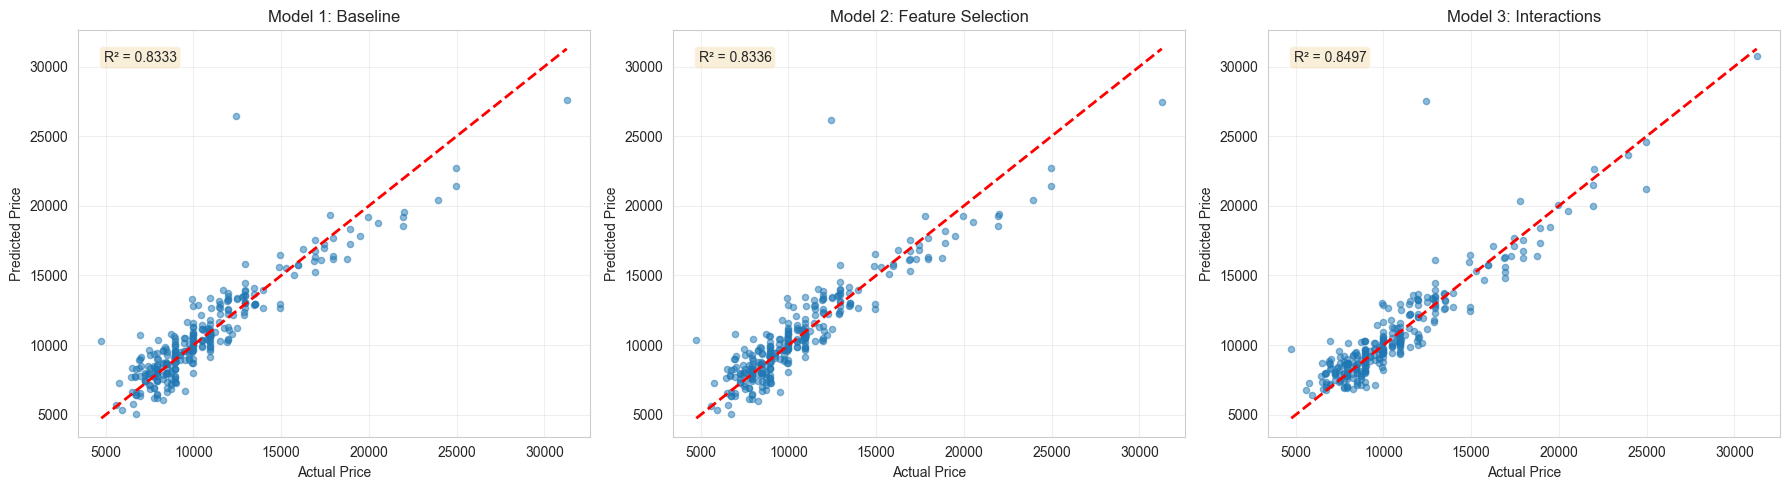

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_preds = [
    (y_test, y_test_pred1, 'Model 1: Baseline'),
    (y_test, y_test_pred2, 'Model 2: Feature Selection'),
    (y_test, y_test_pred3, 'Model 3: Interactions')
]

for i, (y_actual, y_pred, title) in enumerate(models_preds):
    axes[i].scatter(y_actual, y_pred, alpha=0.5, s=20)
    axes[i].plot([y_actual.min(), y_actual.max()], 
                 [y_actual.min(), y_actual.max()], 'r--', lw=2)
    axes[i].set_xlabel('Actual Price')
    axes[i].set_ylabel('Predicted Price')
    axes[i].set_title(title)
    axes[i].grid(True, alpha=0.3)
    r2 = r2_score(y_actual, y_pred)
    axes[i].text(0.05, 0.95, f'R² = {r2:.4f}', transform=axes[i].transAxes,
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


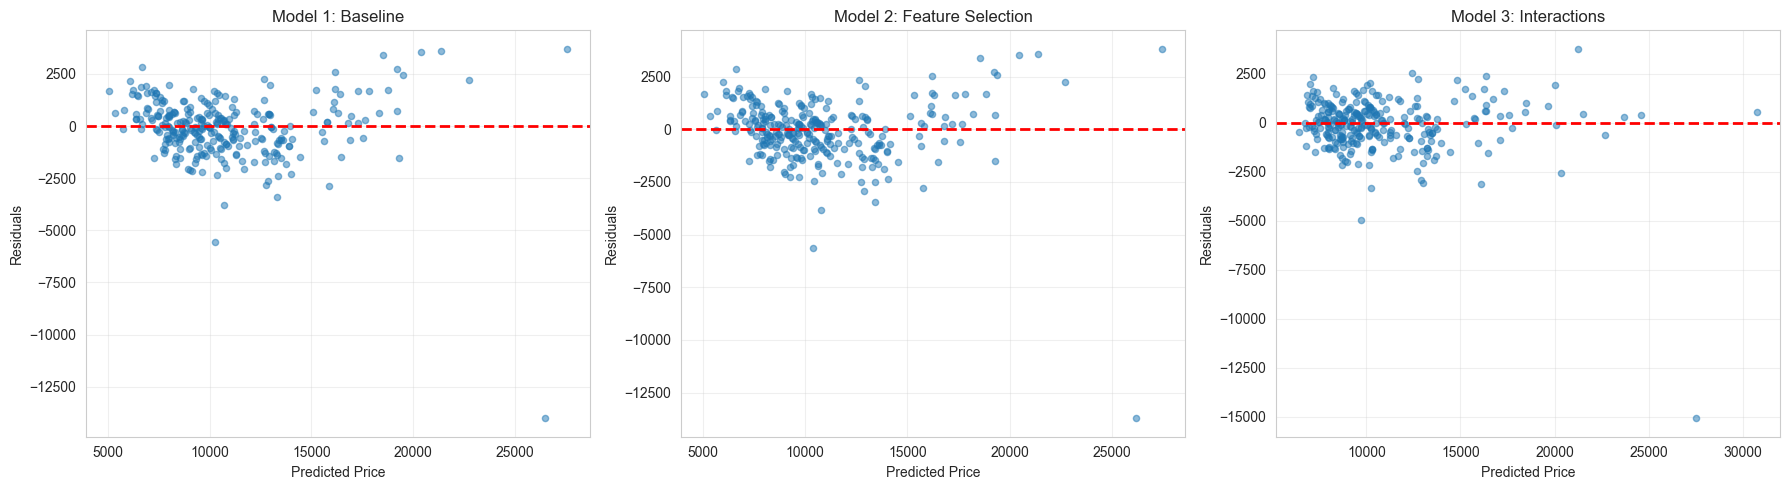

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

residuals_list = [
    (y_test - y_test_pred1, y_test_pred1, 'Model 1: Baseline'),
    (y_test - y_test_pred2, y_test_pred2, 'Model 2: Feature Selection'),
    (y_test - y_test_pred3, y_test_pred3, 'Model 3: Interactions')
]

for i, (residuals, y_pred, title) in enumerate(residuals_list):
    axes[i].scatter(y_pred, residuals, alpha=0.5, s=20)
    axes[i].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[i].set_xlabel('Predicted Price')
    axes[i].set_ylabel('Residuals')
    axes[i].set_title(title)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


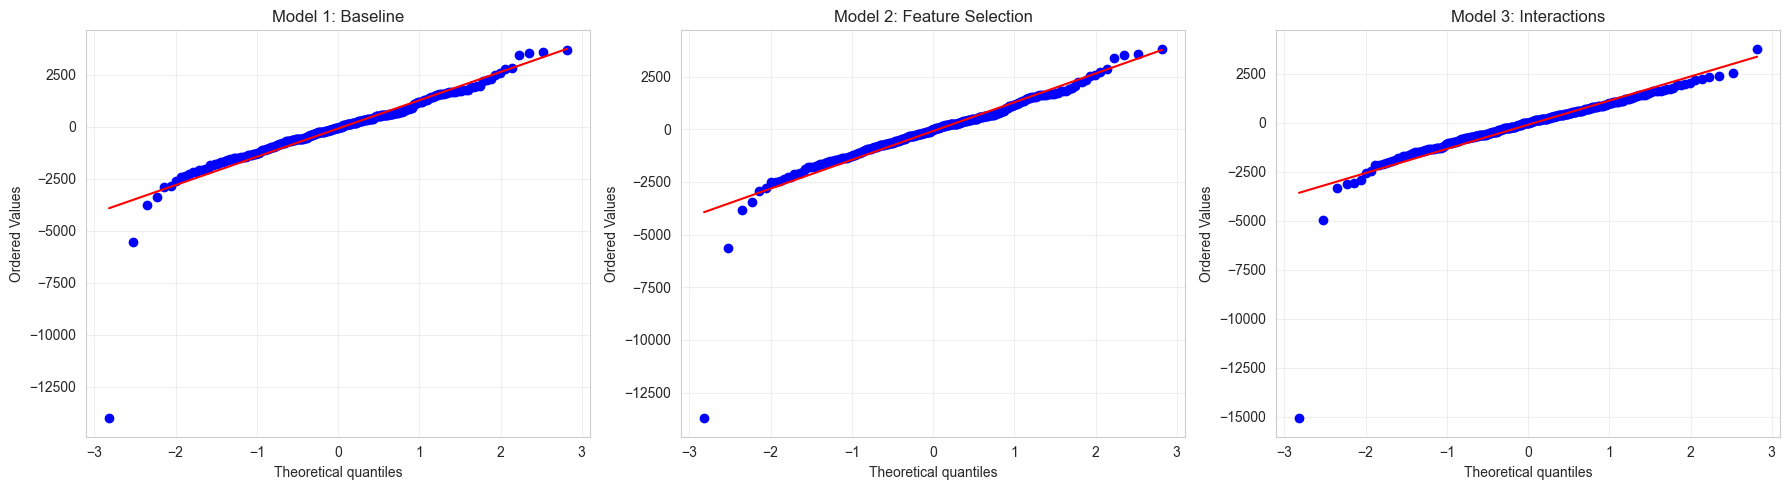

In [59]:
from scipy import stats

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

residuals_list = [
    (y_test - y_test_pred1, 'Model 1: Baseline'),
    (y_test - y_test_pred2, 'Model 2: Feature Selection'),
    (y_test - y_test_pred3, 'Model 3: Interactions')
]

for i, (residuals, title) in enumerate(residuals_list):
    stats.probplot(residuals, dist="norm", plot=axes[i])
    axes[i].set_title(title)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 7. Regularization Techniques


### 7.1 Ridge Regression


In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas_ridge = np.logspace(-2, 4, 50)
ridge_cv = RidgeCV(alphas=alphas_ridge, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train)

print(f"Optimal alpha for Ridge: {ridge_cv.alpha_:.4f}")
print(f"Best CV R² score: {ridge_cv.best_score_:.4f}")


Optimal alpha for Ridge: 82.8643
Best CV R² score: 0.8542


In [61]:
ridge_model = Ridge(alpha=ridge_cv.alpha_)
ridge_model.fit(X_train_scaled, y_train)

y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

print("Ridge Regression Performance Metrics:")
print("="*50)
print(f"Training R²: {r2_train_ridge:.4f}")
print(f"Testing R²: {r2_test_ridge:.4f}")
print(f"Training RMSE: {rmse_train_ridge:.2f}")
print(f"Testing RMSE: {rmse_test_ridge:.2f}")
print(f"Training MAE: {mae_train_ridge:.2f}")
print(f"Testing MAE: {mae_test_ridge:.2f}")


Ridge Regression Performance Metrics:
Training R²: 0.8667
Testing R²: 0.8398
Training RMSE: 1320.95
Testing RMSE: 1462.04
Training MAE: 969.34
Testing MAE: 994.56


In [62]:
print("Ridge Regression Coefficients:")
print("="*50)
coef_df_ridge = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_model.coef_
})
coef_df_ridge['Absolute_Coefficient'] = np.abs(coef_df_ridge['Coefficient'])
coef_df_ridge = coef_df_ridge.sort_values('Absolute_Coefficient', ascending=False)
print(coef_df_ridge)
print(f"\nIntercept: {ridge_model.intercept_:.2f}")


Ridge Regression Coefficients:
           Feature  Coefficient  Absolute_Coefficient
0              Age -2099.473013           2099.473013
6           Weight  1182.747313           1182.747313
1               KM  -698.395937            698.395937
2               HP   300.726519            300.726519
8  FuelType_Petrol   273.411604            273.411604
3        Automatic    29.718644             29.718644
5            Doors   -27.641993             27.641993
7  FuelType_Diesel   -20.792591             20.792591
4               CC    -2.192701              2.192701

Intercept: 10754.40


### 7.2 Lasso Regression


In [63]:
alphas_lasso = np.logspace(-4, 1, 50)
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, max_iter=2000)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Optimal alpha for Lasso: {lasso_cv.alpha_:.6f}")
print(f"Best CV R² score: {lasso_cv.score(X_train_scaled, y_train):.4f}")


Optimal alpha for Lasso: 10.000000
Best CV R² score: 0.8694


In [64]:
lasso_model = Lasso(alpha=lasso_cv.alpha_, max_iter=2000)
lasso_model.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)

print("Lasso Regression Performance Metrics:")
print("="*50)
print(f"Training R²: {r2_train_lasso:.4f}")
print(f"Testing R²: {r2_test_lasso:.4f}")
print(f"Training RMSE: {rmse_train_lasso:.2f}")
print(f"Testing RMSE: {rmse_test_lasso:.2f}")
print(f"Training MAE: {mae_train_lasso:.2f}")
print(f"Testing MAE: {mae_test_lasso:.2f}")


Lasso Regression Performance Metrics:
Training R²: 0.8694
Testing R²: 0.8353
Training RMSE: 1307.82
Testing RMSE: 1482.62
Training MAE: 960.42
Testing MAE: 993.49


In [65]:
print("Lasso Regression Coefficients:")
print("="*50)
coef_df_lasso = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
})
coef_df_lasso['Absolute_Coefficient'] = np.abs(coef_df_lasso['Coefficient'])
coef_df_lasso = coef_df_lasso.sort_values('Absolute_Coefficient', ascending=False)
print(coef_df_lasso)
print(f"\nIntercept: {lasso_model.intercept_:.2f}")

selected_features_lasso = coef_df_lasso[coef_df_lasso['Coefficient'] != 0]
eliminated_features_lasso = coef_df_lasso[coef_df_lasso['Coefficient'] == 0]

print(f"\nFeatures selected by Lasso: {len(selected_features_lasso)}")
print(f"Features eliminated by Lasso: {len(eliminated_features_lasso)}")
if len(eliminated_features_lasso) > 0:
    print(f"\nEliminated features: {list(eliminated_features_lasso['Feature'])}")


Lasso Regression Coefficients:
           Feature  Coefficient  Absolute_Coefficient
0              Age -2264.171493           2264.171493
6           Weight  1288.627169           1288.627169
1               KM  -606.353451            606.353451
8  FuelType_Petrol   451.367905            451.367905
2               HP   239.135134            239.135134
5            Doors   -61.779121             61.779121
3        Automatic    15.295902             15.295902
4               CC    -1.253293              1.253293
7  FuelType_Diesel    -0.000000              0.000000

Intercept: 10754.40

Features selected by Lasso: 8
Features eliminated by Lasso: 1

Eliminated features: ['FuelType_Diesel']


In [66]:
regularization_comparison = pd.DataFrame({
    'Model': ['Model 1 (Baseline)', 'Ridge Regression', 'Lasso Regression'],
    'Test R²': [r2_test1, r2_test_ridge, r2_test_lasso],
    'Test RMSE': [rmse_test1, rmse_test_ridge, rmse_test_lasso],
    'Test MAE': [mae_test1, mae_test_ridge, mae_test_lasso],
    'Alpha': ['N/A', f'{ridge_cv.alpha_:.4f}', f'{lasso_cv.alpha_:.6f}']
})

print("Comparison: Baseline vs Regularization Methods")
print("="*70)
print(regularization_comparison.to_string(index=False))


Comparison: Baseline vs Regularization Methods
             Model  Test R²   Test RMSE   Test MAE     Alpha
Model 1 (Baseline) 0.833295 1491.410755 992.301339       N/A
  Ridge Regression 0.839797 1462.039855 994.562273   82.8643
  Lasso Regression 0.835255 1482.620712 993.493896 10.000000


## 8. Interview Questions


### Q1: What is Normalization & Standardization and how is it helpful?

**Normalization (Min-Max Scaling):**
- Scales features to a fixed range, typically [0, 1]
- Formula: (x - min) / (max - min)
- Useful when data distribution is not Gaussian or when you need bounded values

**Standardization (Z-score Normalization):**
- Transforms features to have mean=0 and std=1
- Formula: (x - mean) / std
- Useful when data follows Gaussian distribution
- Preserves outliers better than normalization

**How it helps in MLR:**
- Regularization methods (Ridge, Lasso) are sensitive to feature scales
- Features with larger scales can dominate the penalty term
- Standardization ensures all features contribute equally to regularization
- Improves convergence speed in gradient-based optimization
- Makes coefficient interpretation more meaningful when comparing features


### Q2: What techniques can be used to address multicollinearity in multiple linear regression?

**1. Variance Inflation Factor (VIF):**
- Measures how much variance of a coefficient increases due to collinearity
- VIF > 10 indicates problematic multicollinearity
- Remove features with high VIF values

**2. Feature Selection:**
- Remove highly correlated features manually
- Use correlation matrix to identify redundant features
- Keep the feature with stronger relationship to target variable

**3. Regularization Methods:**
- **Ridge Regression:** Adds L2 penalty, shrinks coefficients but doesn't eliminate them
- **Lasso Regression:** Adds L1 penalty, can eliminate features by setting coefficients to zero
- Both methods reduce impact of multicollinearity on model stability

**4. Principal Component Analysis (PCA):**
- Transforms correlated features into uncorrelated principal components
- Reduces dimensionality while preserving variance
- Trade-off: Loss of interpretability of original features

**5. Partial Least Squares (PLS):**
- Similar to PCA but considers relationship with target variable
- Creates components that maximize covariance with target

**6. Remove One of Correlated Pairs:**
- If two features are highly correlated (r > 0.8 or 0.9), remove one
- Keep the feature that is more interpretable or has better data quality


## 9. Conclusions and Assumptions


### Model Assumptions Made:

**1. Linearity:**
- Assumed linear relationship between features and target (Price)
- Some relationships may be non-linear (e.g., Age, KM might have diminishing returns)
- **Implication:** Model 3 with interaction terms attempts to capture some non-linearity

**2. Independence of Observations:**
- Assumed each car record is independent
- **Implication:** If violated, standard errors may be underestimated

**3. Homoscedasticity (Constant Variance):**
- Assumed residuals have constant variance across all predicted values
- **Implication:** If violated, predictions may be less reliable for certain price ranges

**4. Normality of Residuals:**
- Assumed residuals are normally distributed
- **Implication:** If violated, confidence intervals and hypothesis tests may be inaccurate

**5. No Perfect Multicollinearity:**
- Assumed features are not perfectly correlated
- **Implication:** VIF analysis helps identify and address multicollinearity issues
